## Test da API 

In [31]:
import pandas as pd
from random import choice
import requests

In [32]:
from datetime import datetime, timedelta
from random import randrange

def random_date(start, end):
    start_date = datetime.strptime(start, '%Y-%m-%d')
    end_date = datetime.strptime(end, '%Y-%m-%d')
    random_days = randrange((end_date - start_date).days)
    return (start_date + timedelta(days=random_days)).strftime('%Y-%m-%d')


## Carga de Dados

In [33]:
base = list()
for _ in range(20):
   data = {
    'date': random_date('2022-01-01', '2023-01-01'),
    'venda_total': choice(range(100,200)),
    'dados_mercado': 'ABC',
    'localidade': choice(['SP','PR','MG','RO'])
   }
   base.append(data)

In [34]:
pd.DataFrame.from_dict(base).head()

,date,venda_total,dados_mercado,localidade
0,2022-10-01,188,ABC,MG
1,2022-12-05,115,ABC,SP
2,2022-01-27,178,ABC,SP
3,2022-08-11,127,ABC,MG
4,2022-09-04,195,ABC,MG


In [35]:
url = 'http://localhost:5000/vendas'
response = requests.post(url, json={"data":base})
print(response.status_code)
print(response.json())


200
{'message': 'Vendas cadastradas com sucesso.'}


## Consulta todas as Vendas

In [36]:
df = pd.DataFrame.from_dict(requests.get("http://localhost:5000/vendas").json()['vendas'])

In [38]:
df

,id,date,venda_total,dados_mercado,localidade
0,1,2022-10-01,188,ABC,MG
1,2,2022-12-05,115,ABC,SP
2,3,2022-01-27,178,ABC,SP
3,4,2022-08-11,127,ABC,MG
4,5,2022-09-04,195,ABC,MG
5,6,2022-05-16,195,ABC,RO
6,7,2022-03-08,168,ABC,SP
7,8,2022-05-31,106,ABC,RO
8,9,2022-10-30,177,ABC,PR
9,10,2022-08-03,119,ABC,PR


## Atualiza Item

In [39]:
requests.get("http://localhost:5000/vendas").json()['vendas'][0]

{'id': 1,
 'date': '2022-10-01',
 'venda_total': 188,
 'dados_mercado': 'ABC',
 'localidade': 'MG'}

In [40]:
import requests

# Define a URL da API e o ID da venda que será atualizada
url = 'http://localhost:5000/vendas'


# Define os dados que serão atualizados
dados_atualizados = [
    {"id":1,'date': '2022-12-22', 'venda_total': 50}
]

# Faz a requisição PUT enviando o ID da venda e os dados atualizados
response = requests.put(url, json=dados_atualizados)

# Exibe a resposta da API
print(response.json())


{'message': 'Vendas atualizadas com sucesso.'}


In [41]:
requests.get("http://localhost:5000/vendas").json()['vendas'][0]

{'id': 1,
 'date': '2022-12-22',
 'venda_total': 50,
 'dados_mercado': 'ABC',
 'localidade': 'MG'}

## Deleta Registro

In [42]:
import requests

# URL da API para excluir uma venda
url = 'http://localhost:5000/vendas'

# ID da venda a ser excluída
venda_id = 1

# Define o payload da requisição
payload = [{'id': venda_id}]

# Envia a requisição DELETE
response = requests.delete(url, json=payload)

# Verifica se a requisição foi bem-sucedida
if response.status_code == 200:
    print('Venda excluída com sucesso!')
else:
    print('Erro ao excluir venda.')


Venda excluída com sucesso!


## Forecast

In [72]:
from dateutil.relativedelta import relativedelta


In [73]:
import requests

# Defina o endpoint da API para o recurso Forecast
url = 'http://localhost:5000/forecast'

# Crie um objeto JSON com as datas inicial e final para previsão
data = {'data_inicial': '2023-01-01', 'data_final': '2024-02-01'}

# Faça a requisição POST com o objeto JSON no corpo da requisição
response = requests.post(url, json=data)

# Obtenha o resultado da previsão no formato JSON
previsao = response.json()



In [47]:
# Imprima o resultado da previsão
# print(previsao)
df_previsao = pd.DataFrame.from_dict(previsao['previsao'])

In [59]:
df_previsao['venda_total'] = df_previsao['venda_total'].apply(lambda value:round(value,2))

In [64]:
media = df_previsao['venda_total'][df_previsao.venda_total > 0].mean()
df_previsao.loc[df_previsao.venda_total < 0, 'venda_total'] = media

<Axes: >

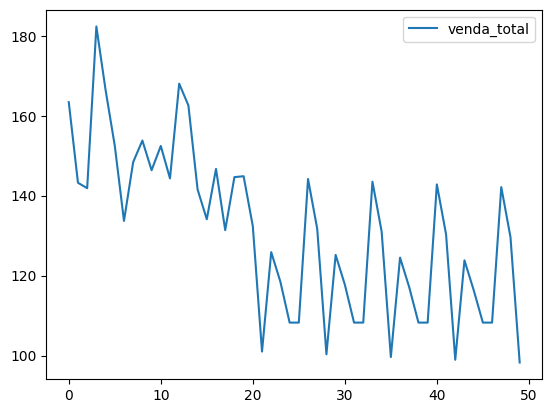

In [70]:
df_previsao.head(50).plot()

In [71]:
df_previsao

,date,venda_total
0,2022-01-27,163.400000
1,2022-02-22,143.230000
2,2022-03-08,141.870000
3,2022-04-10,182.340000
4,2022-05-16,166.450000
...,...,...
412,2024-05-27,94.220000
413,2024-05-28,62.830000
414,2024-05-29,87.710000
415,2024-05-30,80.280000
